# Procesamiento de Imágenes Digitales

Inteligencia Artificial 2023 II <br>
Examen Parcial, parte práctica de la evaluación (12 puntos, 4 puntos cada pregunta).

Integrantes:
1. Cueva Llanos, Lubeliz             20180178B
2. Flores Berrocal, Anthony Aldair   20180037J

Este enunciado está en el archivo "PracticaPI2018.ipynb" o su versión "pdf" que puedes encontrar en el Aula Virtual.

## Objetivos


Los objetivos de esta práctica son:
* Repasar algunos conceptos de filtrado de imágenes y programar algunas rutinas para suavizado y extracción de bordes.
* Implementar un algoritmo de segmentación de imágenes

## Requerimientos

Para esta práctica es necesario disponer del siguiente software:

* Python 3.X
* Jupyter http://jupyter.org/.
* Los paquetes "pip" y  "PyMaxFlow"
* Las librerías científicas de Python: NumPy,  y Matplotlib.
* El paquete PyGame.
* La librería OpenCV.



## Condiciones

* La fecha límite de entrega será el sábado 30 de septiembre a las 08:00 am.
* La entrega consiste en dos archivos con el código, resultados y respuestas a los ejercicios:
  1. Un "notebook" de Jupyter con los resultados. Las respuestas a los ejercicios debes introducirlas en tantas celdas de código o texto como creas necesarias, insertadas inmediatamente después de  un enuciado y antes del siguiente.
  2. Un documento "pdf" generado a partir del fuente de Jupyter, por ejemplo usando el comando ``jupyter nbconvert --execute --to pdf notebook.ipynb``, o simplemente imprimiendo el "notebook" desde el navegador en la opción del menú "File->Print preview". Asegúrate de que el documento "pdf" contiene todos los resultados correctamente ejecutados.
* Esta parte de la práctica se realiza en grupos de 2 personas.

## Suavizado

**Ejercicio 1.** En las prácticas calificadas 1 y 2 hemos trabajado con una sola imagen y sobre ella hemos aplicado nuestros filtros de paso bajo y paso alto. Sin embargo ahora hemos cambiado nuestra cámara de un modo de toma única a una secuencia continua de tomas de imágenes (multi-shot),Se trata de un modo de disparo continuo también llamado modo ráfaga (*burst mode*). Se han obtenido las secuencias autorafaga1_(0:9).jpg y autorafaga2_(0:9).jpg para realizar las pruebas de este apartado.

Las secuencias de imágenes permiten utilizar el promediado de imágenes **image averaging** para eliminar el ruido, la última técnica que vamos a probar. En esta técnica, el contenido de cada píxel en la imagen final es el resultado de promediar el valor de ese píxel en toda la secuencia. Tenga en cuenta que, en el contexto de nuestra aplicación, esta técnica sólo funcionará si el coche está completamente parado.

La idea detrás del promedio de imágenes es que, utilizando un alto número de imágenes ruidosas de una cámara fja en una escena estática, la imagen resultante será libre de ruido. Esto se supone porque algunos tipos de ruido suelen tener media cero. Matemáticamente:

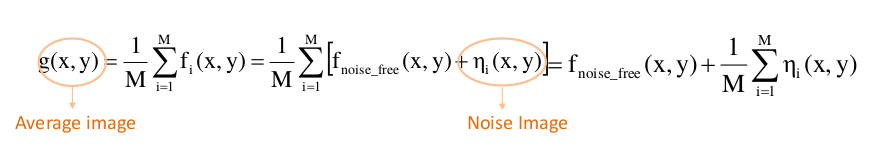

$$
g(x,y) =
\frac{1}{M} \sum_{i=1}^M f_i(x,y) =
\frac{1}{M} \sum_{i=1}^M [f_{\text{noise_free}}(x,y)+n_i(x,y)] = \\
= f_{\text{noise_free}}(x,y) + \frac{1}{M} \sum_{i=1}^M n_i(x,y)
$$

Este método

- es muy eficaz con ruido gaussiano, y
- también preserva los bordes.



Por el contrario:

- no funciona bien con ruido salt&pepper, y
- sólo es aplicable a secuencias de imágenes de una escena fija.




Queremos analizar la idoneidad de este método para nuestra aplicación, así que tienes que completar el método `image_averaging()` method.
Este método toma:
- una secuencia de imágenes estructurada como un array multidimensional [sequence length $\times$ height $\times$ width], y
- el número de imágenes que se van a utilizar.

*Tip: Puedes tomar ideas de aquí: [average of an array along a specified axis](https://docs.scipy.org/doc/numpy-1.9.2/reference/generated/numpy.average.html)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Implementa una función que:
# -- tome un número de imágenes de la secuencia (burst_length)
# -- promedia el valor de cada pixel en la parte seleccionada de la secuencia
# -- muestra la primera imagen de la secuencia y la final filtrada en un gráfico 1x2 si verbose = True
# -- devuelve la imagen promedio (average image)
def image_averaging(burst, burst_length, verbose=False):
    """ Aplica el promediado de imagenes a una secuencia de imagenes y la muestra.

        Args:
            burst: Matriz 3D que contiene la secuencia de imagenes completa.
            burst_length: Numero natural que indica cuantas imagenes
                          se van a utilizar.
            verbose: Sólo mostrar imágenes si es True

        Returns:
            average_img: imagen suavizada
    """

    #Tomar solo imágenes `burst_length`
    #burst = None
    burst = burst[:burst_length]

    # Aplicar el promediado de imágenes
    #average_img = None
    average_img = np.mean(burst, axis=0)

    # Cambiar el tipo de datos a 8 bits sin signo, como se espera para plt.imshow()
    #average_img = average_img.astype(np.uint8)
    average_img = average_img.astype(np.uint8)

    if verbose:
        # muestra la imagen inicial
        #plt.subplot(121)
        plt.subplot(1, 2, 1)
        #plt.imshow(None, None')
        plt.imshow(burst[0], cmap='gray')
        plt.title('Noisy')
        plt.show()

        # muestra la imagen resultante
        #plt.subplot(122)
        plt.subplot(1, 2, 2)
        #plt.imshow(None, None)
        plt.imshow(average_img, cmap='gray')
        plt.title('Image averaging')

        plt.show()

    return average_img

You can use the next code to **test if your results are correct**:

In [2]:
burst = np.array([[[1,6,2,5],[10,6,22,7],[7,7,13,0],[0,2,8,4]],
                  [[7,7,13,0],[0,2,8,4],[1,6,2,5],[10,6,22,7]],
                  [[7,7,13,0],[0,2,8,4],[1,6,2,5],[10,6,22,7]]],dtype=np.uint8)

print(image_averaging(burst, 2))

[[ 4  6  7  2]
 [ 5  4 15  5]
 [ 4  6  7  2]
 [ 5  4 15  5]]


<font color='blue'>**Expected output:**  </font>

    [[ 4  6  7  2]
     [ 5  4 15  5]
     [ 4  6  7  2]
     [ 5  4 15  5]]

Now check how the number of images used affect the noise removal (play with both sequences):

In [3]:
from ipywidgets import interactive, fixed

# Interactua con la duración de la rafaga de imágenes
# leer la secuencia de imagens
burst = []
for i in range(10):
    burst.append(cv2.imread('./imagenes/autorafaga1_' + str(i) + '.jpg', 0))

# cast a el tipo array
burst = np.asarray(burst)

interactive_plot = interactive(image_averaging, burst=fixed(burst), burst_length=(1, 10, 1), verbose=fixed(True))
output = interactive_plot.children[-1]
interactive_plot


interactive(children=(IntSlider(value=5, description='burst_length', max=10, min=1), Output()), _dom_classes=(…

### <font color="blue"><b><i>Analizando (5)</i></b></font>

**Se te pidió** probar **image_averaging** con las secuencias de imágenes de `autorafaga1_XX.jpg` y `autorafaga2_XX.jpg`. Ahora, **responde estas preguntas**:

- ¿Se logró remover el ruido en ambas secuencias?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Pon tu respuesta aquí</i></p>

- ¿Qué número de fotos debe tomar la cámara en cada secuencia de imágenes?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Pon tu respuesta aquí</i></p>

- ¿Que otras cosas has observado en este ejercicio? o ¿qué comentarios adicionarías para fortalecer tu explicación?

    <p style="margin: 4px 0px 6px 5px; color:blue"><i>Pon tu respuesta aquí</i></p>

## Segmentación

**Ejercicio 2.** Desarrolla una función que realice la segmentación del objeto central de una imagen a partir de una segmentación manual
inicial realizada por el usuario. Puedes tomar como base el código proporcionado en el archivo segmentacion_util.py. En la optimización:
1. toma como afinidad entre una pareja de píxeles la
diferencia en sus valores de color, y;
2. sólo establece los términos unitarios de los píxeles
marcados por el usuario.

Aplícalo, al menos, a las imágenes ``hombre.png`` y ``caballo.jpg``. Muestra y discute los resultados.

*Tip: Puedes tomar ideas de aquí: [ejemplos en código de uso de la librería PyMaxflow](https://github.com/pmneila/PyMaxflow/blob/master/examples/binary_restoration.py)

In [25]:
#################################
# Segmentacion de imagen a la "Grab Cut" simplificado
#################################


import numpy as np

import maxflow
from maxflow import Graph
import matplotlib.pyplot as plt
import codigo.select_pixels as sel
import cv2

imgName='imagenes/caballo.jpg'

imgbgr = cv2.imread(imgName)
img = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)

# Marco algunos pixeles que pertenecen el objeto y el fondo
markedImg = sel.select_fg_bg(img)

# creando el grafo
g = Graph[float]()

#Añade los nodos. nodeids tiene los identificadores de los nodos en el grid
nodeids = g.add_grid_nodes(img.shape[:2])

# Calcula los costes de los nodos no terminales del grafo

# Estos son los costes de los vecinos horizontales
exp_aff_h = np.abs(img[:-1, :] - img[1:, :]).sum(axis=2)
# Estos son los costes de los vecinos verticales
exp_aff_v = np.abs(img[:, :-1] - img[:, 1:]).sum(axis=2)

# Construyo el grafo 
# Para construir el grafo relleno las estructuras
hor_struc=np.array([[0, 0, 0],[1, 0, 0],[0, 0, 0]])
ver_struc=np.array([[0, 1, 0],[0, 0, 0],[0, 0, 0]])
# Construyo el grafo 
g.add_grid_edges(nodeids, exp_aff_h, hor_struc,symmetric=True)
g.add_grid_edges(nodeids, exp_aff_v, ver_struc,symmetric=True)

# Leo los pixeles etiquetados
# Los marcados en rojo representan el objeto
pts_fg = np.transpose(np.where(np.all(np.equal(markedImg,(255,0,0)),2)))
# Los marcados en verde representan el fondo
pts_bg = np.transpose(np.where(np.all(np.equal(markedImg,(0,255,0)),2)))

# Incluyo las conexiones a los nodos terminales
# Pesos de los nodos terminales
g.add_grid_tedges(nodeids[pts_fg[:,0],pts_fg[:,1]], ...)
g.add_grid_tedges(nodeids[pts_bg[:,0],pts_bg[:,1]], ...)

# Encuentra el flujo maximo
g.maxflow()
# obtiene los segmentos de los nodos en el grid.
sgm = g.get_grid_segments(nodeids)

# Muestro el resultado de la segmentacion
plt.figure()
plt.imshow(np.uint8(np.logical_not(sgm)),cmap='gray')
plt.show()

# Lo muestro junto con la imagen para ver el resultado
plt.figure()
wgs=(np.float_(np.logical_not(sgm))+0.3)/1.3

# Replico los pesos para cada canal y ordeno los indices
wgs=np.rollaxis(np.tile(wgs,(3,1,1)),0,3)
plt.imshow(np.uint8(np.multiply(img,wgs)))
plt.show()


ImportError: cannot import name 'Graph' from 'maxflow' (/home/lbr/ia/parcial2023ii/.venv/lib/python3.10/site-packages/maxflow/__init__.py)

**Ejercicio 3.** Perfecciona el algoritmo previamente abordado. Puedes incorporar algunas de las sugerencias que planteo a continuación o bien, considerar otras que consideres más adecuadas:
* Refina la segmentación de forma iterativa.
* Optimiza la función de afinidad entre píxeles para lograr una mayor precisión.
* Mejora la asignación de valores unitarios a los píxeles.

Tu objetivo es elevar la calidad de la segmentación, especialmente en lo que respecta a las imágenes tratadas previamente. A continuación, exhibe y comenta los resultados alcanzados en esta mejora.





